Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing

In [3]:
car_dataset = pd.read_csv('Car_price_data_cleaned.csv')

In [4]:
car_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5,861000,450000
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,2100000,1750000
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5,1065000,994999
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7,3201000,1500000
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5,4787000,1855000


In [5]:
car_dataset.shape

(794, 13)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               794 non-null    object 
 1   Location           794 non-null    object 
 2   Year               794 non-null    int64  
 3   Kilometers_Driven  794 non-null    int64  
 4   Fuel_Type          794 non-null    object 
 5   Transmission       794 non-null    object 
 6   Owner_Type         794 non-null    object 
 7   Mileage            794 non-null    float64
 8   Engine             794 non-null    float64
 9   Power              794 non-null    float64
 10  Seats              794 non-null    int64  
 11  New_Price          794 non-null    int64  
 12  Price              794 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 80.8+ KB


In [7]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Owner_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Diesel    430
Petrol    364
Name: count, dtype: int64
Owner_Type
First     741
Second     52
Third       1
Name: count, dtype: int64
Transmission
Manual       502
Automatic    292
Name: count, dtype: int64


Encoding the Categorical Data

In [8]:
car_dataset.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':1,'Automatic':2}},inplace=True)

car_dataset.replace({"Owner_Type":{"First":1,"Second":2,"Third":3,"Fourth & Above Owner": 4}},inplace=True)

In [9]:
car_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,1,1,1,13.00,1199.0,88.70,5,861000,450000
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,2,2,1,11.36,2755.0,171.50,8,2100000,1750000
2,Maruti Ciaz Zeta,Kochi,2018,25692,1,1,1,21.56,1462.0,103.25,5,1065000,994999
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,2,1,1,13.50,2477.0,175.56,7,3201000,1500000
4,BMW 3 Series 320d,Kochi,2014,32982,2,2,1,22.69,1995.0,190.00,5,4787000,1855000


In [10]:
car_dataset.to_csv("ready_to_use_model.csv")

Splitting the data and Target

In [11]:
X = car_dataset.drop(["Name",'Location',"Price"],axis=1)
Y = car_dataset['Price']

In [12]:
print(X)

     Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0    2011              46000          1             1           1    13.00   
1    2016              36000          2             2           1    11.36   
2    2018              25692          1             1           1    21.56   
3    2014             110000          2             1           1    13.50   
4    2014              32982          2             2           1    22.69   
..    ...                ...        ...           ...         ...      ...   
789  2016              10000          1             1           1    17.57   
790  2011              38000          1             1           1    16.09   
791  2016              37208          2             1           1    24.30   
792  2013              33746          1             1           1    18.50   
793  2014              27365          2             1           1    28.40   

     Engine   Power  Seats  New_Price  
0    1199.0   88.70    

In [13]:
print(Y)

0       450000
1      1750000
2       994999
3      1500000
4      1855000
        ...   
789     400000
790     325000
791     743000
792     320000
793     475000
Name: Price, Length: 794, dtype: int64


Splitting Training and Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

Model Training

1. Linear Regression

In [15]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [17]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9036038574981067


Visualize the actual prices and Predicted prices

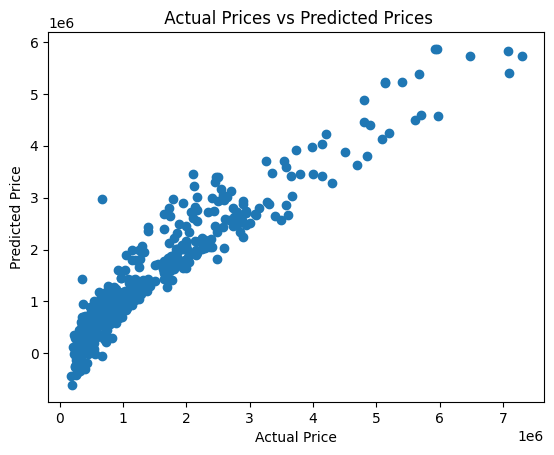

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [20]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [21]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9079198508009277


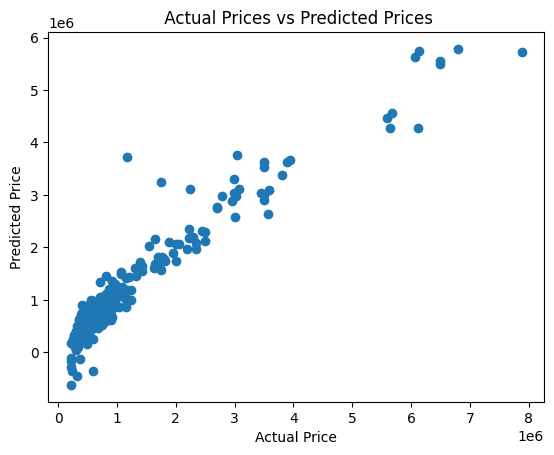

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [23]:
print("Do you want to check resale prices of your car [y:1 / n:0]:\t")
p=int(input())
if p!=0:
    Name=input("Enter name of your car: ")
    Location=input("Enter your location: ")
    Year=int(input("Enter the year in which the car was bought: "))
    Kilometers_Driven=int(input("Enter the number of kilometers driven: "))
    Fuel_Type=int(input("Enter the fuel type of your car [petrol:1,diesel:2,cng:3]: "))
    Transmission=int(input("Enter the transmission type [Manual:1,Automatic:2]: "))
    Owner_Type=int(input("Enter owner type [First:1,Second:2,Third:3,Fourth & Above Owner: 4]"))
    Mileage=int(input("Enter the mileage of the vehicle: "))
    Engine=int(input("Enter the amount of cc your engine is: "))
    Power=int(input("Enter the power of your vehicle: "))
    Seats=int(input("Enter the number of seats in your vehicle: "))
    New_Price=int(input("Enter the price at which the vehicle was bought: "))

    test_data=[[Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price]]
    x_eval=pd.DataFrame(test_data)
    pred_Price=lin_reg_model.predict(x_eval.values)
    pred_Price

Do you want to check resale prices of your car [y:1 / n:0]:	
